# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Your code here.
student_data = pd.DataFrame({'X': [17,51,27,21,36,48,19,26,54,30], 'Y': [10,1,5,9,4,2,9,6,0,3]})
student_data



,X,Y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

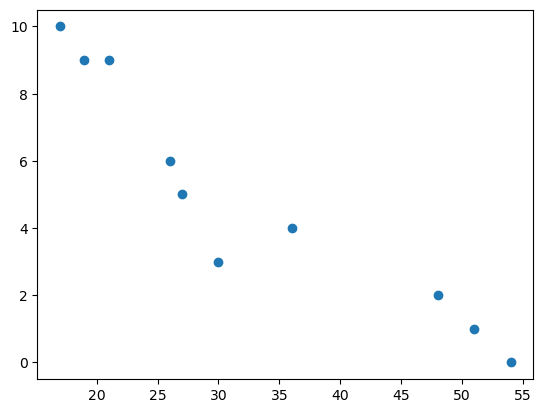

In [2]:
# Your code here.
plt.scatter(x=student_data["X"], y=student_data["Y"])
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [3]:
# Your response here. 
# there seems to be an inversely proportional relationship between the age of a student and the time they are late to class

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [8]:
# Your response here.
#correlation:
print("correlation: ", student_data['X'].corr(student_data['Y']))

#covariance:
print("covariance: ", student_data['X'].cov(student_data['Y']))


correlation:  -0.9391626886887122
covariance:  -45.56666666666666


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [18]:
from sklearn import linear_model
# Your response here.
x = student_data[['X']]
y = student_data[['Y']]

model = linear_model.LinearRegression()
model.fit(x,y)

y_hat = model.intercept_+ model.coef_[0]* x
print(model.intercept_)
print(model.coef_[0])



[12.88880336]
[-0.24282077]


Plot your regression model on your scatter plot.

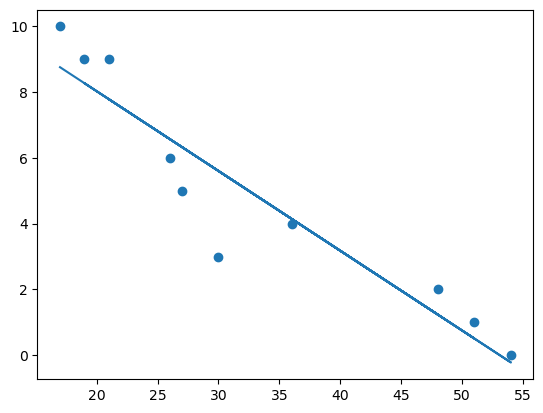

In [13]:
# Your code here.
plt.plot(x.values, y_hat.values)
plt.scatter(x,y)
plt.show()


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [ ]:
# Your response here. 
# as expected, the line fits the data quite well, proving the correlation between age and being late to class


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [19]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("vehicles.csv")
vehicles.head(2)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [56]:
# Your response here. 
vehicles2= vehicles[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year", "CO2 Emission Grams/Mile"]]
corr_df = vehicles2.corr()
corr_df.sort_values(by="CO2 Emission Grams/Mile", ascending=False)

# Fuel barrels/year and fuel cost/year have the strongest correlation to CO2 Emission, as seen on the corr_df below


,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [58]:
# Your response here. 
X=vehicles[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year"]]
y=vehicles["CO2 Emission Grams/Mile"]
multi_lin_reg = linear_model.LinearRegression()
multi_lin_reg.fit(X,y)

# using a multi linear regression model

LinearRegression()

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [61]:
# Your response here. 

print(multi_lin_reg.intercept_)
print(multi_lin_reg.coef_)

# r2
multi_lin_reg.score(X,y)

769.8882836465807
[-0.32061673  1.87879976 19.05292507 -3.04039938  0.03230948]


0.9808734920269122

In [ ]:
# b0 is 768.88, which is where the line intercepts the y axis
# the r2 is closer to one, which makes this a pretty good linear regression model


## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [62]:
# Your code here.
attendance = pd.DataFrame({"x":[1,3,4,6,8,9,11,14],"y":[1,2,4,4,5,7,8,13]})
attendance


,x,y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

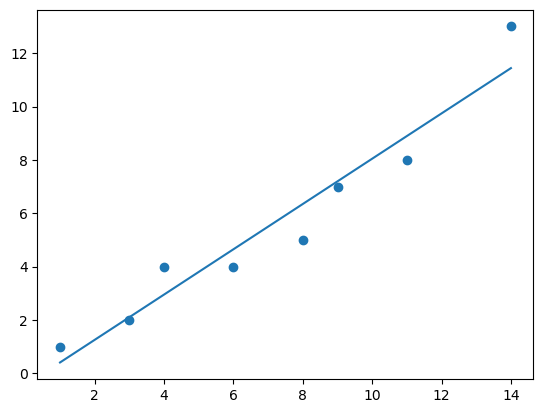

In [64]:
# Your code here.
x = attendance[["x"]]
y = attendance["y"]

model = linear_model.LinearRegression()
model.fit(x,y)

y_hat = model.intercept_ + model.coef_*x
plt.plot(x.values,y_hat.values)

plt.scatter(x,y)
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [65]:
# Your response here. 
print(model.intercept_)
print(model.coef_)
print(model.score(x, y))

# the r2 is 0.93, which makes me confident about this model.
# the chart tells us the more people i invite, the more come to my party

-0.43939393939393945
[0.84848485]
0.9316696375519905


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

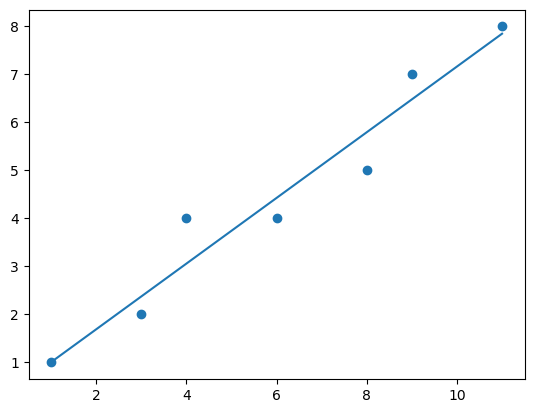

0.9433811802232854

In [66]:
# Your response here. 
attendance_clean = pd.DataFrame({'x': [1,3,4,6,8,9,11], 'y': [1,2,4,4,5,7,8]})
x = attendance_clean[['x']]
y = attendance_clean['y']

model = linear_model.LinearRegression()
model.fit(x,y)

y_hat = model.intercept_+ model.coef_[0] * x

plt.plot(x.values, y_hat.values)
plt.scatter(x,y)
plt.show()

model.score(x,y)



What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [67]:
# Your response here. 

# removing the outlier, as expected, increases my model score. r2 increase 1 decimal value.